In [ ]:
#=============================================================================
#                        Symmetric Icon Attractor 
#=============================================================================
#
#            imgX = imgX * X - imgY * Y
#            imgY = imgY * X + imgX * Y
#            imgZ = (a * (X * X + Y * Y) + e) + b * (imgX * X - imgY * Y)
#
#            X = imgZ * X - d * Y + c * imgX
#            Y = d * X + imgZ * Y - c * imgY
#
#=============================================================================

In [1]:
import numpy as np
import pandas as pd
import panel as pn
import datashader as ds
from numba import jit
from datashader import transfer_functions as tf

In [2]:
@jit(nopython=True)
def SymmetricIcon_trajectory(x0, y0, n, a, b, c, d, e, f):
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    
    for i in np.arange(n-1):
        
        # Create imgX, imgY
        imgX, imgY = x[i], y[i]
    
        # Update imgX, imgY
        for k in range(1, f-1):
            tmpX = imgX*x[i] - imgY*y[i]
            tmpY = imgY*x[i] + imgX*y[i]
            imgX, imgY = tmpX, tmpY
            
        # Create imgZ
        imgZ = (a*(x[i]**2 + y[i]**2) + e) + b*(imgX*x[i] - imgY*y[i])
        
        # Update X, Y
        x[i+1] = imgZ*x[i] - d*y[i] + c*imgX 
        y[i+1] = d*x[i] + imgZ*y[i] - c*imgY
    
    return x, y

In [3]:
def SymmetricIcon_plot(n=20000000, a=1.8,  b=0.0,    c=1.0,   d=0.1,   e=-1.93, f=5, cmap=["gold", "red"]):
    # Initial value of X and Y
    x0, y0 =0.01, 0.01
    cvs = ds.Canvas(plot_width=900, plot_height=900)
    
    x, y = SymmetricIcon_trajectory(x0, y0, n, a, b, c, d, e, f)
    agg = cvs.points(pd.DataFrame({'x':x, 'y':y}), 'x', 'y')
    
    return tf.shade(agg, cmap)

Column
    [0] Column
        [0] IntSlider(end=50000000, name='n', start=1, value=20000000)
        [1] FloatSlider(end=5.4, name='a', start=-1.8, value=1.8)
        [2] FloatSlider(end=1.0, name='b', start=0.0, value=0.0)
        [3] FloatSlider(end=3.0, name='c', start=-1.0, value=1.0)
        [4] FloatSlider(end=0.30000000000000004, name='d', start=-0.1, value=0.1)
        [5] FloatSlider(end=1.93, name='e', start=-5.79, value=-1.93)
        [6] IntSlider(end=15, name='f', start=-5, value=5)
    [1] Row
        [0] PNG(Image, name='interactive00006')
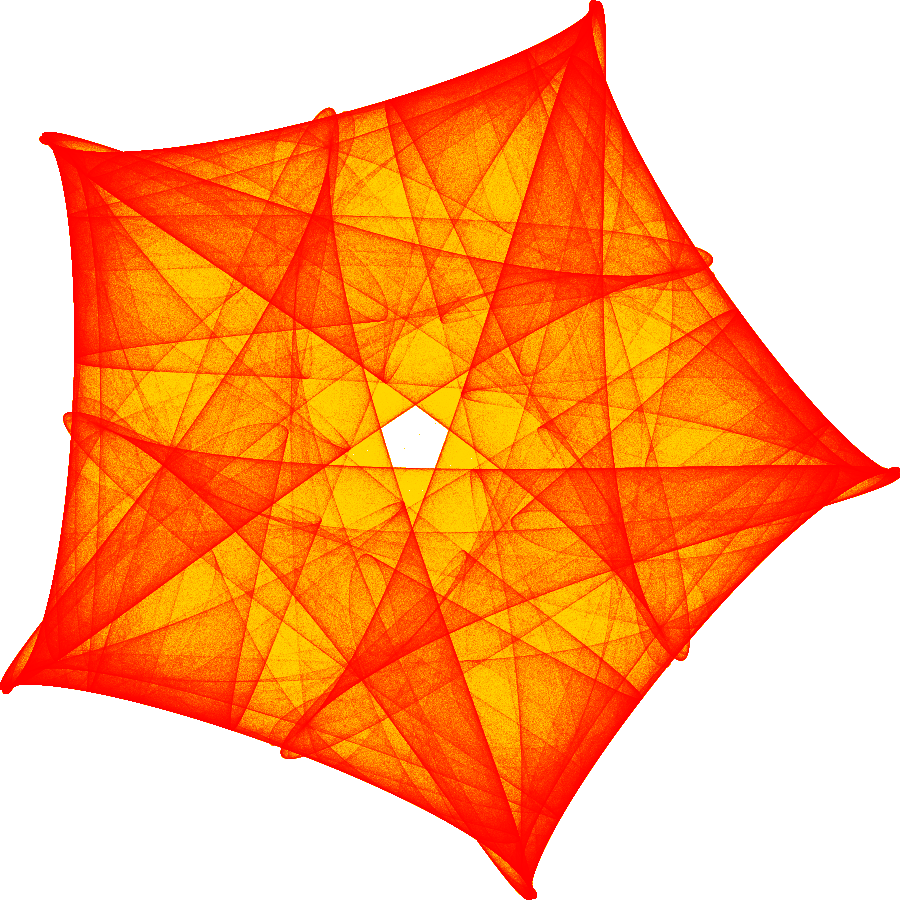

In [4]:
pn.extension()
pn.interact(SymmetricIcon_plot, n=(1,50000000))

In [5]:
# ============================================================
# 　　　　　　　Parameter Sample
# ============================================================

#Sample1  : a=1.8,  b=0.0,    c=1.0,   d=0.1,   e=-1.93, f=5
#Sample2  : a=5.0,  b=-1.0,   c=1.0,   d=0.19,  e=-2.5,  f=5
#Sample3  : a=-1.0, b=0.1,    c=-0.82, d=0.12,  e=1.56,  f=3
#Sample4  : a=1.81, b=0.0,    c=1.0,   d=0.0,   e=-1.81, f=5
#Sample5  : a=10.0, b=-12.0,  c=1.0,   d=0.0,   e=-2.20, f=3
#Sample6  : a=-2.5, b=0.0,    c=0.9,   d=0.0,   e=2.5,   f=3
#Sample7  : a=3.0,  b=-16.79, c=1.0,   d=0.0,   e=-2.05, f=9
#Sample8  : a=5.0,  b=1.5,    c=1.0,   d=0.0,   e=-2.7,  f=6
#Sample9  : a=1.0,  b=-0.1,   c=0.17,  d=0.0,   e=-2.08, f=7
#Sample10 : a=2.32, b=0.0,    c=0.75,  d=0.0,   e=-2.32, f=5
#Sample11 : a=-2.0, b=0.0,    c=-0.5,  d=0.0,   e=2.6,   f=5
#Sample12 : a=2.0,  b=0.2,    c=0.1,   d=0.0,   e=-2.34, f=5
#Sample13 : a=2.0,  b=0.0,    c=1.0,   d=0.1,   e=-1.86, f=4
#Sample14 : a=-1.0, b=0.1,    c=-0.82, d=0.0,   e=1.56,  f=3
#Sample15 : a=-1.0, b=0.03,   c=-0.8,  d=0.0,   e=1.46,  f=3
#Sample16 : a=-2.5, b=-0.1,   c=0.9,   d=-0.15, e=2.39,  f=16